# Improving the prediction - features and model parameters

Objective: Learn the basics of feature engineering and parameter optimization

* Exploratory data analysis before prediction
* Feature weights on the model
* Parameter search to improve the model

### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get the Data

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [9]:

cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

#### Copy the features to a data frame

In [10]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Check data integrity


In [12]:
# Any missing data?
np.sum(pd.isnull(df).sum())

0

#### Copy the targets to a data frame

In [13]:
cancer['target'][0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
df['Cancer'] = pd.DataFrame(cancer['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Exploratory Data Analysis

#### Distribution of different cases

<Axes: xlabel='Cancer', ylabel='count'>

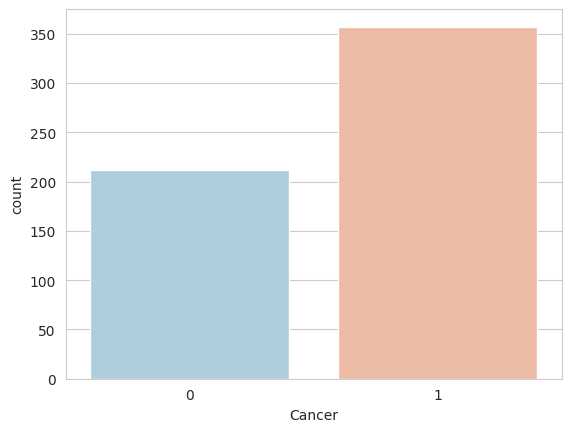

In [15]:

sns.set_style('whitegrid')
sns.countplot(x='Cancer',data=df,palette='RdBu_r')

#### Mean and spread of the features
Plot box plots with a loop

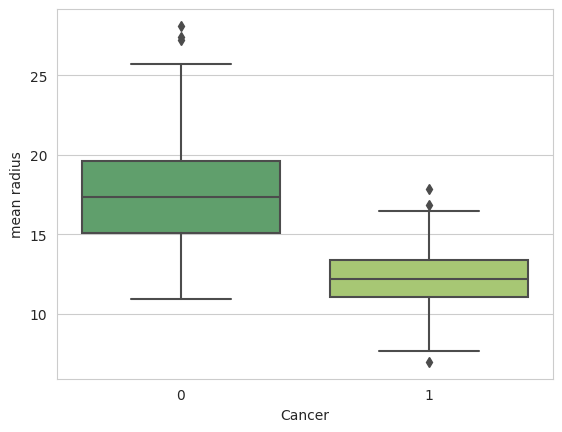

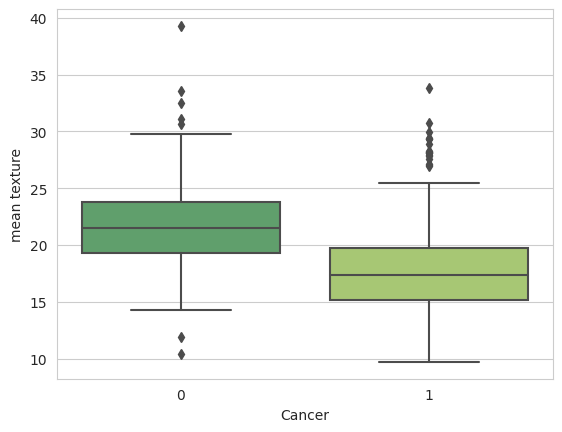

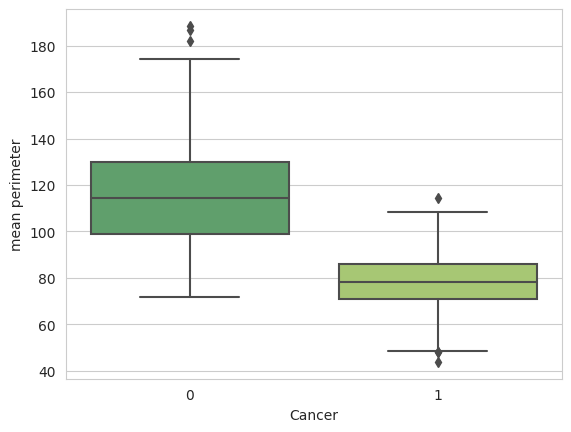

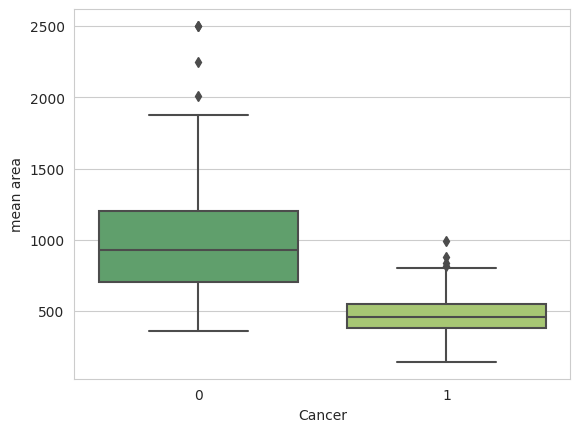

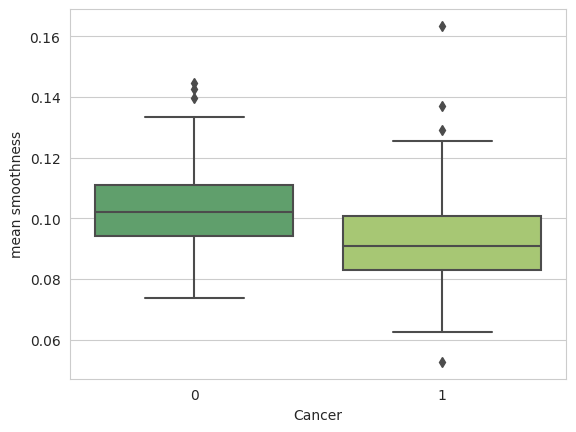

<Figure size 640x480 with 0 Axes>

In [16]:
l=list(df.columns[0:6])
for i in range(len(l)-1):
    sns.boxplot(x='Cancer',y=l[i], data=df, palette='summer')
    plt.figure()

#### Take a close look at some of the features to decide what to keep and what to drop
For example, if you take some of the outliers, the smoothness does not differentiate the two cases.

Text(0.5, 1.0, 'Cancer Type vs Mean Smoothness')

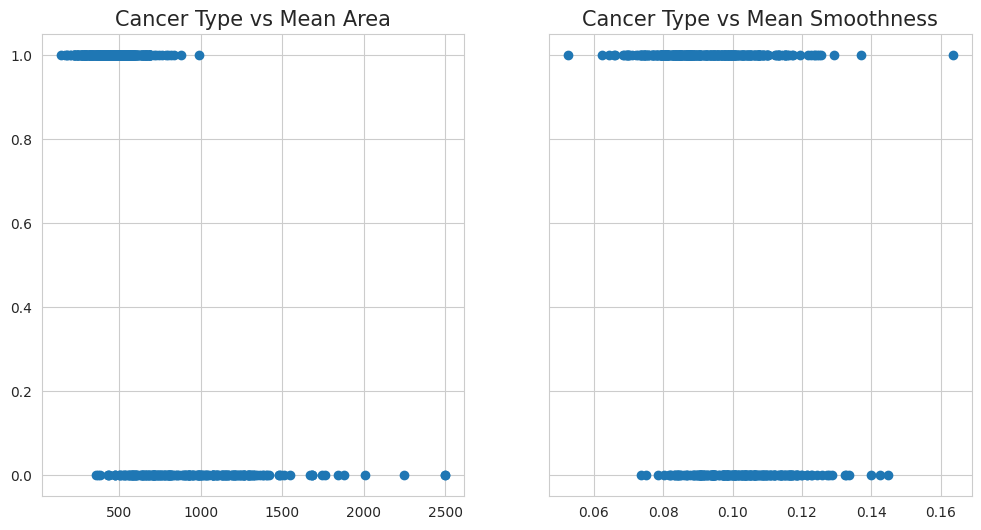

In [17]:
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))
ax1.scatter(df['mean area'],df['Cancer'])
ax1.set_title("Cancer Type vs Mean Area", fontsize=15)
ax2.scatter(df['mean smoothness'],df['Cancer'])
ax2.set_title("Cancer Type vs Mean Smoothness", fontsize=15)

### Data preperation for the model - Train and Test Split

In [21]:
from sklearn.model_selection import train_test_split
df_target = df['Cancer'] # Dataframe for target
df_feat = df.drop('Cancer',axis=1) # Dataframe for features
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.25, random_state=97)
print(type(X_train), type(y_train), type(X_test), type(y_test))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(426, 30) (426,) (143, 30) (143,)


### Model Training

In [19]:
from sklearn.svm import SVC
model = SVC(C=0.0001, gamma=0.00001)
model.fit(X_train,y_train)

SVC(C=0.0001, gamma=1e-05)

### Model evaluation and Prediction

In [22]:
predictions = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 0 56]
 [ 0 87]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.61      1.00      0.76        87

    accuracy                           0.61       143
   macro avg       0.30      0.50      0.38       143
weighted avg       0.37      0.61      0.46       143



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Grid Search
GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train.

In [24]:
print(model.get_params(deep=True))

{'C': 0.0001, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1e-05, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [25]:
param_grid = {'C': [0.1, 10], 'gamma': [1, 0.01], 'kernel': ['rbf', 'linear']}

In [26]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
grid.fit(X_train,y_train) # this takes some time

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10], 'gamma': [1, 0.01],
                         'kernel': ['rbf', 'linear']},
             verbose=1)

In [27]:
# Check the best parameters
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [28]:
# Check
grid.best_estimator_

SVC(C=0.1, gamma=1, kernel='linear')

In [29]:

grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))


[[50  6]
 [ 4 83]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        56
           1       0.93      0.95      0.94        87

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143



In [31]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=10)
model_rf.fit(X_train,y_train)
predictions = model_rf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[53  3]
 [ 3 84]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        56
           1       0.97      0.97      0.97        87

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



[0.05306509 0.01361854 0.04235556 0.04681228 0.01007173 0.00611154
 0.0249678  0.12546839 0.00279832 0.00406359 0.01299084 0.00434283
 0.03102605 0.02456055 0.00459847 0.00458821 0.0084558  0.00201429
 0.00383509 0.0056144  0.11537691 0.01827922 0.09987013 0.10989013
 0.00962543 0.01425628 0.02222307 0.16269012 0.01034099 0.00608834]


<BarContainer object of 30 artists>

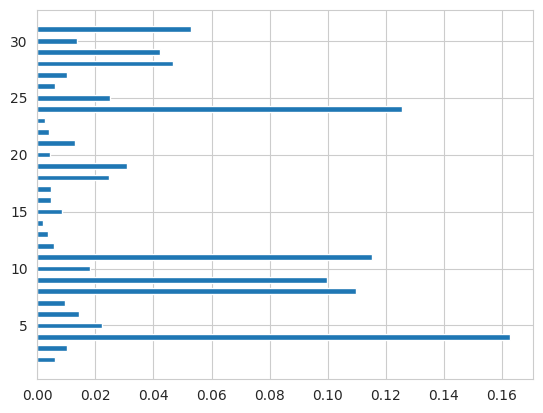

In [32]:
#print(model_rf.feature_importances_)
#plt.barh(model_rf.feature_importances_, width=0.5)
#plt.barh(range(model_rf.n_features_in_+1,1,-1),width=model_rf.feature_importances_,height=0.5)

[0.05306509 0.01361854 0.04235556 0.04681228 0.01007173 0.00611154
 0.0249678  0.12546839 0.00279832 0.00406359 0.01299084 0.00434283
 0.03102605 0.02456055 0.00459847 0.00458821 0.0084558  0.00201429
 0.00383509 0.0056144  0.11537691 0.01827922 0.09987013 0.10989013
 0.00962543 0.01425628 0.02222307 0.16269012 0.01034099 0.00608834]


<Axes: >

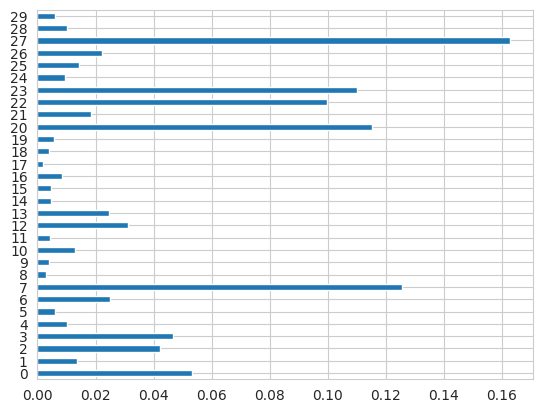

In [34]:
print(model_rf.feature_importances_)
feat_importances = pd.Series(model_rf.feature_importances_)
feat_importances.plot(kind='barh', width=0.5)

In [ ]:
print(df.iloc[0:1,1])
df.head()

0    10.38
Name: mean texture, dtype: float64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Summary
Choise of the model, model parameters, and feature selections are important to improve the prediction accuracy.